In [3]:
import numpy as np 
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police à 1.5 * 12pt
from scipy import stats
from sklearn.linear_model import LinearRegression

**Il faut télécharger le package openpyxl**

# Projet ISSD

## 1. Premier tour

### 1.1 Prétraitements des données

In [83]:
DATA=pd.read_excel('resultats-par-niveau-cirlg-t1-france-entiere.xlsx',index_col='Code du département')
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 01 to ZZ
Columns: 102 entries, Libellé du département to Unnamed: 102
dtypes: float64(32), int64(31), object(39)
memory usage: 464.3+ KB


On esseyra de nettoyer la data en éliminant les doublons et en éliminant les cases où au moins un valeur est manquante pour qu'elles n'influencent pas les calculs.

In [82]:
DATAA=DATA.drop_duplicates()
DATAA=DATAA.dropna(how='any')
DATAA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 01 to ZZ
Columns: 102 entries, Libellé du département to Unnamed: 102
dtypes: float64(32), int64(31), object(39)
memory usage: 464.3+ KB


*On peut remarquer à l'aide de la fonction DATA.info() et DATAA.info() qu'il n'y en a aucun doublon ou cases avec une valeur manquante.*

Lorsque on visualise le Data avec *DATAA.head()* on remarque que les colonnes correspondant aux autres candidats n'ont pas de nom.
On renomme ainsi les colonnes sans nom par les titres correspondant et on divise la DATA en des DataFrames de chaque candidat.

In [90]:
str1="Unnamed: "
i=26
for k in range(1,18):
    str2=str(i)
    str3=str(i+1)
    str4=str(i+2)
    str5=str(i+3)
    str6=str(i+4)
    str7=str(i+5)
    str8=str(i+6)
    i+=7
    
    DATAA.rename(columns={str1+str5:'Prénom'+str(k),str1+str6:'Voix'+str(k),str1+str7:'%Voix/Ins'+str(k),str1+str8:'%Voix/Exp'+str(k)},inplace=True)
    DATAA.rename(columns={str1+str2:'N_panneau'+str(k),str1+str3:'Sexe'+str(k),str1+str4:'Nom'+str(k)},inplace=True)
   


df1=pd.DataFrame(DATAA,columns=['Libellé du département','Code de la circonscription','Libellé de la circonscription','Etat saisie','Inscrits','Abstentions','% Abs/Ins','Votants','% Vot/Ins','Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Nom','Voix','% Voix/Ins','% Voix/Exp'])
df1.rename(columns={'% Voix/Ins': '%Voix/Ins','% Voix/Exp': '%Voix/Exp'},inplace=True)
df2=pd.DataFrame(DATAA,columns=['Libellé du département','Code de la circonscription','Libellé de la circonscription','Etat saisie','Inscrits','Abstentions','% Abs/Ins','Votants','% Vot/Ins','Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Nom1','Voix1','%Voix/Ins1','%Voix/Exp1'])
df2.rename(columns={'Nom1':'Nom','Voix1':'Voix','%Voix/Ins1': '%Voix/Ins','%Voix/Exp1': '%Voix/Exp'},inplace=True)
df3=pd.DataFrame(DATAA,columns=['Libellé du département','Code de la circonscription','Libellé de la circonscription','Etat saisie','Inscrits','Abstentions','% Abs/Ins','Votants','% Vot/Ins','Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Nom2','Voix2','%Voix/Ins2','%Voix/Exp2'])
df3.rename(columns={'Nom2':'Nom','Voix2':'Voix','%Voix/Ins2': '%Voix/Ins','%Voix/Exp2': '%Voix/Exp'},inplace=True)
df4=pd.DataFrame(DATAA,columns=['Libellé du département','Code de la circonscription','Libellé de la circonscription','Etat saisie','Inscrits','Abstentions','% Abs/Ins','Votants','% Vot/Ins','Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Nom3','Voix3','%Voix/Ins3','%Voix/Exp3'])
df4.rename(columns={'Nom3':'Nom','Voix3':'Voix','%Voix/Ins3': '%Voix/Ins','%Voix/Exp3': '%Voix/Exp'},inplace=True)
df5=pd.DataFrame(DATAA,columns=['Libellé du département','Code de la circonscription','Libellé de la circonscription','Etat saisie','Inscrits','Abstentions','% Abs/Ins','Votants','% Vot/Ins','Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Nom4','Voix4','%Voix/Ins4','%Voix/Exp4'])
df5.rename(columns={'Nom4':'Nom','Voix4':'Voix','%Voix/Ins4': '%Voix/Ins','%Voix/Exp4': '%Voix/Exp'},inplace=True)
df6=pd.DataFrame(DATAA,columns=['Libellé du département','Code de la circonscription','Libellé de la circonscription','Etat saisie','Inscrits','Abstentions','% Abs/Ins','Votants','% Vot/Ins','Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Nom5','Voix5','%Voix/Ins5','%Voix/Exp5'])
df6.rename(columns={'Nom5':'Nom','Voix5':'Voix','%Voix/Ins5': '%Voix/Ins','%Voix/Exp5': '%Voix/Exp'},inplace=True)
df7=pd.DataFrame(DATAA,columns=['Libellé du département','Code de la circonscription','Libellé de la circonscription','Etat saisie','Inscrits','Abstentions','% Abs/Ins','Votants','% Vot/Ins','Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Nom6','Voix6','%Voix/Ins6','%Voix/Exp6'])
df7.rename(columns={'Nom6':'Nom','Voix6':'Voix','%Voix/Ins6': '%Voix/Ins','%Voix/Exp6': '%Voix/Exp'},inplace=True)
df8=pd.DataFrame(DATAA,columns=['Libellé du département','Code de la circonscription','Libellé de la circonscription','Etat saisie','Inscrits','Abstentions','% Abs/Ins','Votants','% Vot/Ins','Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Nom7','Voix7','%Voix/Ins7','%Voix/Exp7'])
df8.rename(columns={'Nom7':'Nom','Voix7':'Voix','%Voix/Ins7': '%Voix/Ins','%Voix/Exp7': '%Voix/Exp'},inplace=True)
df9=pd.DataFrame(DATAA,columns=['Libellé du département','Code de la circonscription','Libellé de la circonscription','Etat saisie','Inscrits','Abstentions','% Abs/Ins','Votants','% Vot/Ins','Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Nom8','Voix8','%Voix/Ins8','%Voix/Exp8'])
df9.rename(columns={'Nom8':'Nom','Voix8':'Voix','%Voix/Ins8': '%Voix/Ins','%Voix/Exp8': '%Voix/Exp'},inplace=True)
df10=pd.DataFrame(DATAA,columns=['Libellé du département','Code de la circonscription','Libellé de la circonscription','Etat saisie','Inscrits','Abstentions','% Abs/Ins','Votants','% Vot/Ins','Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Nom9','Voix9','%Voix/Ins9','%Voix/Exp9'])
df10.rename(columns={'Nom9':'Nom','Voix9':'Voix','%Voix/Ins9': '%Voix/Ins','%Voix/Exp9': '%Voix/Exp'},inplace=True)
df11=pd.DataFrame(DATAA,columns=['Libellé du département','Code de la circonscription','Libellé de la circonscription','Etat saisie','Inscrits','Abstentions','% Abs/Ins','Votants','% Vot/Ins','Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Nom10','Voix10','%Voix/Ins10','%Voix/Exp10'])
df11.rename(columns={'Nom10':'Nom','Voix10':'Voix','%Voix/Ins10': '%Voix/Ins','%Voix/Exp10': '%Voix/Exp'},inplace=True)
df12=pd.DataFrame(DATAA,columns=['Libellé du département','Code de la circonscription','Libellé de la circonscription','Etat saisie','Inscrits','Abstentions','% Abs/Ins','Votants','% Vot/Ins','Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Nom11','Voix11','%Voix/Ins11','%Voix/Exp11'])
df12.rename(columns={'Nom11':'Nom','Voix11':'Voix','%Voix/Ins11': '%Voix/Ins','%Voix/Exp11': '%Voix/Exp'},inplace=True)

En utilisant *DATAA.describe()* on peut voir qu'il n'existe pas de valeurs aberrantes. Ceci est déduit en calculant l'ecart interquartile EIQ et comparer les valeurs min et max de chaque colonnes numériques avec Q1-1.5xEIQ et Q3-1.5xEIQ respectivement.

### 1.2 Traitement des données 

#### 1.2.1 Traitement général

On crée d'abord une liste contenant les noms des candidats.

In [1]:
labels=['ARTHAUD','ROUSSEL','MACRON','LASSALLE','LEPEN','ZEMMOUR','MÉLENCHON','HIDALGO','JADOT','PÉCRESSE','POUTOU','DUPONT-AIGNAN']

On trace le Pie graphe du nombre total de voix obtenues pour voir les deux candidats qui vont passer au deuxième tour.

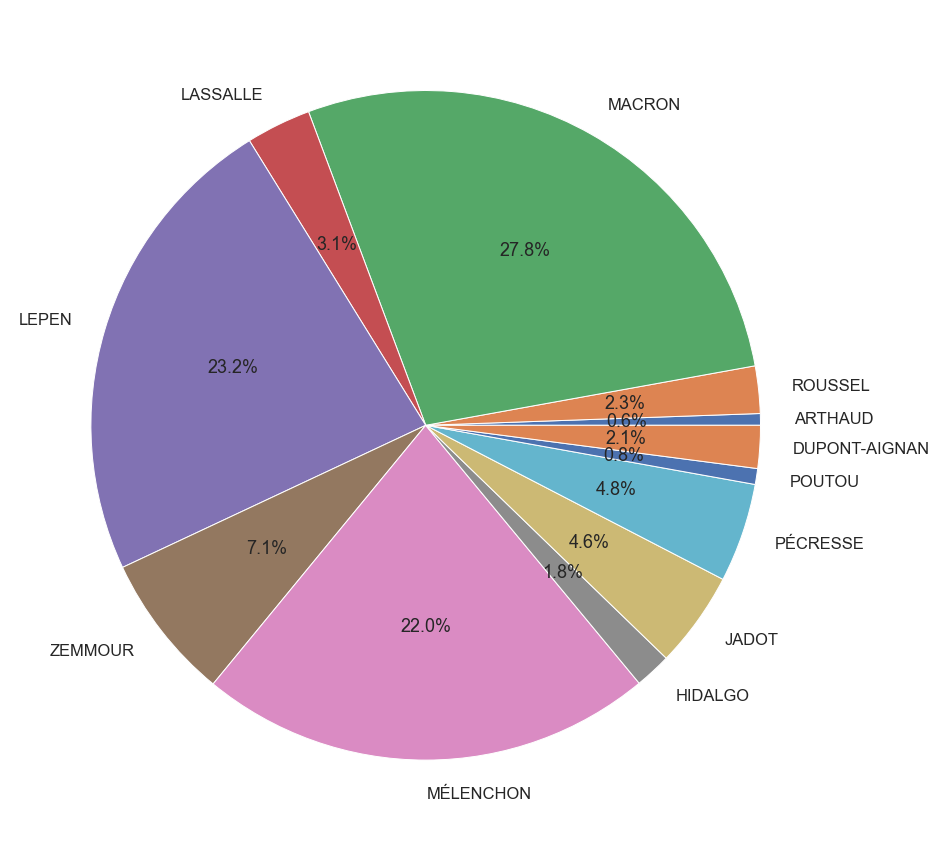

In [52]:
list2=[df1['Voix'].sum(),df2['Voix'].sum(),df3['Voix'].sum(),df4['Voix'].sum(),df5['Voix'].sum(),df6['Voix'].sum(),df7['Voix'].sum(),df8['Voix'].sum(),df9['Voix'].sum(),df10['Voix'].sum(),df11['Voix'].sum(),df12['Voix'].sum()]
plt.figure(figsize=(15,18))
plt.pie(list2,labels=labels,autopct='%1.1f%%')
plt.show()

*Macron et Lepen sont donc les deux vainqueurs du premier tour.*

On récupère le classement des candidats en terme de nombre de voix obtenues

In [6]:
Classement={}
for i in range(12):
    Classement[labels[i]]=list2[i]
sorted(Classement.items(),key=lambda t:t[1],reverse=True)


[('MACRON', 9783058),
 ('LEPEN', 8133828),
 ('MÉLENCHON', 7712520),
 ('ZEMMOUR', 2485226),
 ('PÉCRESSE', 1679001),
 ('JADOT', 1627853),
 ('LASSALLE', 1101387),
 ('ROUSSEL', 802422),
 ('DUPONT-AIGNAN', 725176),
 ('HIDALGO', 616478),
 ('POUTOU', 268904),
 ('ARTHAUD', 197094)]

On Préléve le nombres d'*Inscrits*, le nombre de *Votants*, le nombre de *Votes blancs*, le nombre d'*Abstentions* et le nombre de *Votes nuls* dans toute la France.

In [7]:
list3=[]
Ins=DATAA['Inscrits'].sum()
list3.append(Ins)
Abs=DATAA['Abstentions'].sum()
list3.append(Abs)
Vot=DATAA['Votants'].sum()
list3.append(Vot)
Blanc=DATAA['Blancs'].sum()
list3.append(Blanc)
Nuls=DATAA['Nuls'].sum()
list3.append(Nuls)
list4=['Ins','Abs','Vot','Blanc','Nuls']


dic={'Names':list4,'Nombre':list3}
DT=pd.DataFrame(dic)
DT.head()

,Names,Nombre
0,Ins,48747876
1,Abs,12824169
2,Vot,35923707
3,Blanc,543609
4,Nuls,247151


On trace un barplot pour mieux visualiser le taux de participation dans les élections cette année.

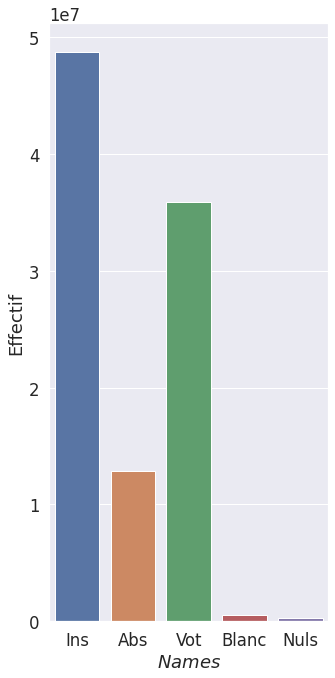

In [86]:
plt.figure(figsize=(5,11))
sns.barplot(x="Names", y="Nombre", data= DT)
plt.xlabel('$Names$')
plt.ylabel('Effectif')
plt.show()

#### 1.2.2 Traitement par département

On traitera maintenant les données par département, on créera d'abord la liste contenant les codes des départements.

In [9]:
cdd=[]

for i in range(1,10):
    cdd.append('0'+str(i))
    
for i in range(10,20):
    
    cdd.append(str(i))
    
cdd.append('2A')
cdd.append('2B')    

for i in range(21,96):
    
    cdd.append(str(i))


   
cdd.append('ZA')
cdd.append('ZB')
cdd.append('ZC')
cdd.append('ZD')
cdd.append('ZM')
cdd.append('ZN')
cdd.append('ZP')
cdd.append('ZS')
cdd.append('ZW')
cdd.append('ZX')
cdd.append('ZZ')

    
print(cdd)
print(len(cdd))


['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2A', '2B', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', 'ZA', 'ZB', 'ZC', 'ZD', 'ZM', 'ZN', 'ZP', 'ZS', 'ZW', 'ZX', 'ZZ']
107


Soit Y le nom du candidat, le dictionnaire Y contient les DataFrames correspondant à chaque département du candidat Y, le dictionnaire Y2 contient le nombres de voix acquis dans chaque département, le dictionnaire Y3 contient le pourcentage moyen de voix obtenus par rapport aux votes exprimés

In [25]:
ARTHAUD={}
ROUSSEL={}
MACRON={}
LASSALLE={}
LEPEN={}
ZEMMOUR={}
MÉLENCHON={}
HIDALGO={}
JADOT={}
PÉCRESSE={}
POUTOU={}
DUPONT_AIGNAN={}

ARTHAUD2={}
ROUSSEL2={}
MACRON2={}
LASSALLE2={}
LEPEN2={}
ZEMMOUR2={}
MÉLENCHON2={}
HIDALGO2={}
JADOT2={}
PÉCRESSE2={}
POUTOU2={}
DUPONT_AIGNAN2={}

ARTHAUD3={}
ROUSSEL3={}
MACRON3={}
LASSALLE3={}
LEPEN3={}
ZEMMOUR3={}
MÉLENCHON3={}
HIDALGO3={}
JADOT3={}
PÉCRESSE3={}
POUTOU3={}
DUPONT_AIGNAN3={}



for i in range(len(cdd)):
    dff1=df1[df1.index.str.startswith(cdd[i])]
    dff2=df2[df2.index.str.startswith(cdd[i])]
    dff3=df3[df3.index.str.startswith(cdd[i])]
    dff4=df4[df4.index.str.startswith(cdd[i])]
    dff5=df5[df5.index.str.startswith(cdd[i])]
    dff6=df6[df6.index.str.startswith(cdd[i])]
    dff7=df7[df7.index.str.startswith(cdd[i])]
    dff8=df8[df8.index.str.startswith(cdd[i])]
    dff9=df9[df9.index.str.startswith(cdd[i])]
    dff10=df10[df10.index.str.startswith(cdd[i])]
    dff11=df11[df11.index.str.startswith(cdd[i])]
    dff12=df12[df12.index.str.startswith(cdd[i])]
    
    ARTHAUD[cdd[i]]=pd.DataFrame(dff1,columns=['Voix','%Voix/Ins','%Voix/Exp',])
    ROUSSEL[cdd[i]]=pd.DataFrame(dff2,columns=['Voix','%Voix/Ins','%Voix/Exp',])
    MACRON[cdd[i]]=pd.DataFrame(dff3,columns=['Voix','%Voix/Ins','%Voix/Exp',])
    LASSALLE[cdd[i]]=pd.DataFrame(dff4,columns=['Voix','%Voix/Ins','%Voix/Exp',])
    LEPEN[cdd[i]]=pd.DataFrame(dff5,columns=['Voix','%Voix/Ins','%Voix/Exp',])
    ZEMMOUR[cdd[i]]=pd.DataFrame(dff6,columns=['Voix','%Voix/Ins','%Voix/Exp',])
    MÉLENCHON[cdd[i]]=pd.DataFrame(dff7,columns=['Voix','%Voix/Ins','%Voix/Exp',])
    HIDALGO[cdd[i]]=pd.DataFrame(dff8,columns=['Voix','%Voix/Ins','%Voix/Exp',])
    JADOT[cdd[i]]=pd.DataFrame(dff9,columns=['Voix','%Voix/Ins','%Voix/Exp',])
    PÉCRESSE[cdd[i]]=pd.DataFrame(dff10,columns=['Voix','%Voix/Ins','%Voix/Exp',])
    POUTOU[cdd[i]]=pd.DataFrame(dff11,columns=['Voix','%Voix/Ins','%Voix/Exp',])
    DUPONT_AIGNAN[cdd[i]]=pd.DataFrame(dff12,columns=['Voix','%Voix/Ins','%Voix/Exp',])
    
    ARTHAUD2[cdd[i]]=dff1['Voix'].sum()
    ROUSSEL2[cdd[i]]=dff2['Voix'].sum()
    MACRON2[cdd[i]]=dff3['Voix'].sum()
    LASSALLE2[cdd[i]]=dff4['Voix'].sum()
    LEPEN2[cdd[i]]=dff5['Voix'].sum()
    ZEMMOUR2[cdd[i]]=dff6['Voix'].sum()
    MÉLENCHON2[cdd[i]]=dff7['Voix'].sum()
    HIDALGO2[cdd[i]]=dff8['Voix'].sum()
    JADOT2[cdd[i]]=dff9['Voix'].sum()
    PÉCRESSE2[cdd[i]]=dff10['Voix'].sum()
    POUTOU2[cdd[i]]=dff11['Voix'].sum()
    DUPONT_AIGNAN2[cdd[i]]=dff12['Voix'].sum()
    
    ARTHAUD3[cdd[i]]=dff1['%Voix/Exp'].mean()
    ROUSSEL3[cdd[i]]=dff2['%Voix/Exp'].mean()
    MACRON3[cdd[i]]=dff3['%Voix/Exp'].mean()
    LASSALLE3[cdd[i]]=dff4['%Voix/Exp'].mean()
    LEPEN3[cdd[i]]=dff5['%Voix/Exp'].mean()
    ZEMMOUR3[cdd[i]]=dff6['%Voix/Exp'].mean()
    MÉLENCHON3[cdd[i]]=dff7['%Voix/Exp'].mean()
    HIDALGO3[cdd[i]]=dff8['%Voix/Exp'].mean()
    JADOT3[cdd[i]]=dff9['%Voix/Exp'].mean()
    PÉCRESSE3[cdd[i]]=dff10['%Voix/Exp'].mean()
    POUTOU3[cdd[i]]=dff11['%Voix/Exp'].mean()
    DUPONT_AIGNAN3[cdd[i]]=dff12['%Voix/Exp'].mean()
    
    
    

    
    


#### A.Exemple pour un candidat(Marine LEPEN)

In [91]:
#print(LEPEN)
#print(LEPEN2)
#print(LEPEN3)

On récupère le dataframe des nombres de voix obtenues dans chaque département pour ce candidat.

In [12]:
a=[i for i in LEPEN2.values()]

dic2={}
dic2['code du département']=cdd
dic2['nombre de voix']=a
DT2=pd.DataFrame(dic2)
DT2.head(n=10)

,code du département,nombre de voix
0,01,86755
1,02,104342
2,03,50315
3,04,26010
4,05,19696
5,06,148919
6,07,49594
7,08,48242
8,09,21958
9,10,49316


On trace ensuite un barplot pour visualisser où LEPEN a eu le plus de votes.

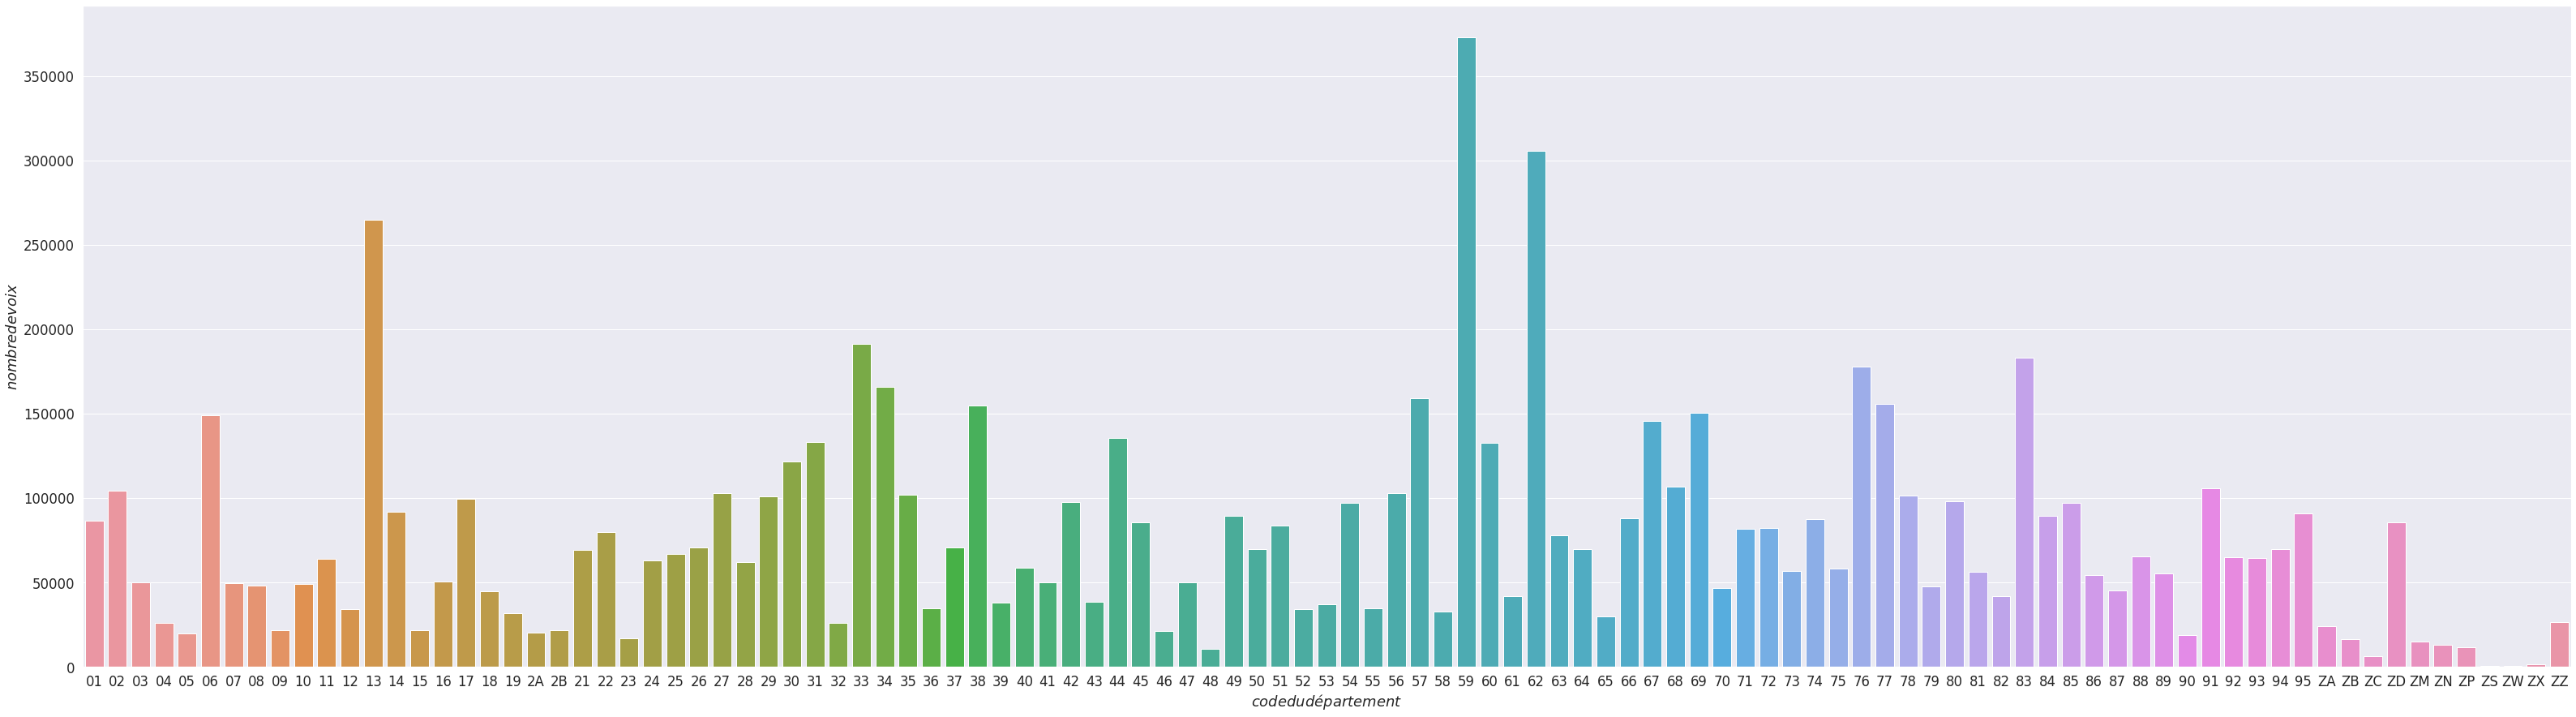

In [97]:
plt.figure(figsize=(55,15))
sns.barplot(x="code du département", y="nombre de voix", data= DT2)
plt.xlabel('$code du département$')
plt.ylabel('$nombre de voix$')
plt.show()

*On remarque que pour LEPEN, le maximum de voix a été obtenu dans le département 59.*

Pour visualiser plus rapidement les départements où elle a dominé le plus :

In [13]:
sorted(LEPEN3.items(),key=lambda t:t[1],reverse=True)

[('ZM', 42.21),
 ('02', 39.378),
 ('62', 38.69416666666666),
 ('52', 37.035),
 ('08', 36.096666666666664),
 ('55', 35.195),
 ('70', 34.6),
 ('10', 32.97333333333333),
 ('80', 32.535999999999994),
 ('66', 32.4075),
 ('27', 32.298),
 ('60', 32.25714285714285),
 ('88', 32.21),
 ('89', 31.153333333333336),
 ('57', 30.555555555555557),
 ('51', 30.410000000000004),
 ('83', 30.213749999999997),
 ('11', 30.126666666666665),
 ('30', 29.224999999999998),
 ('2A', 29.205),
 ('84', 29.176),
 ('58', 29.155),
 ('59', 29.114285714285714),
 ('82', 28.865),
 ('28', 28.5925),
 ('36', 28.41),
 ('2B', 28.04),
 ('41', 27.779999999999998),
 ('18', 27.736666666666668),
 ('61', 27.73),
 ('72', 27.556),
 ('43', 27.475),
 ('47', 27.400000000000002),
 ('68', 27.381666666666664),
 ('90', 27.355),
 ('71', 27.296),
 ('03', 27.05),
 ('04', 26.939999999999998),
 ('54', 26.904999999999998),
 ('06', 26.660000000000004),
 ('76', 26.547999999999995),
 ('39', 26.093333333333334),
 ('16', 26.06),
 ('01', 25.898000000000003)

**En général, pour trouver où un candidat Y a eu le meilleur pourcentage de votes, on exécute :**

*sorted(Y3.items(),key=lambda t:t[1],reverse=True)*

On crée maintenant le dataframe contenant le pourcetage de voix obtenues dans chaque département et on trace un barplot pour mieux visualiser le taux de réussite dans les différents départements.

In [56]:
#Pour LEPEN
b=[i for i in LEPEN3.values()]
dic3={}
dic3['code du département']=cdd
dic3['Pourcentage de voix']=b
DT3=pd.DataFrame(dic3)


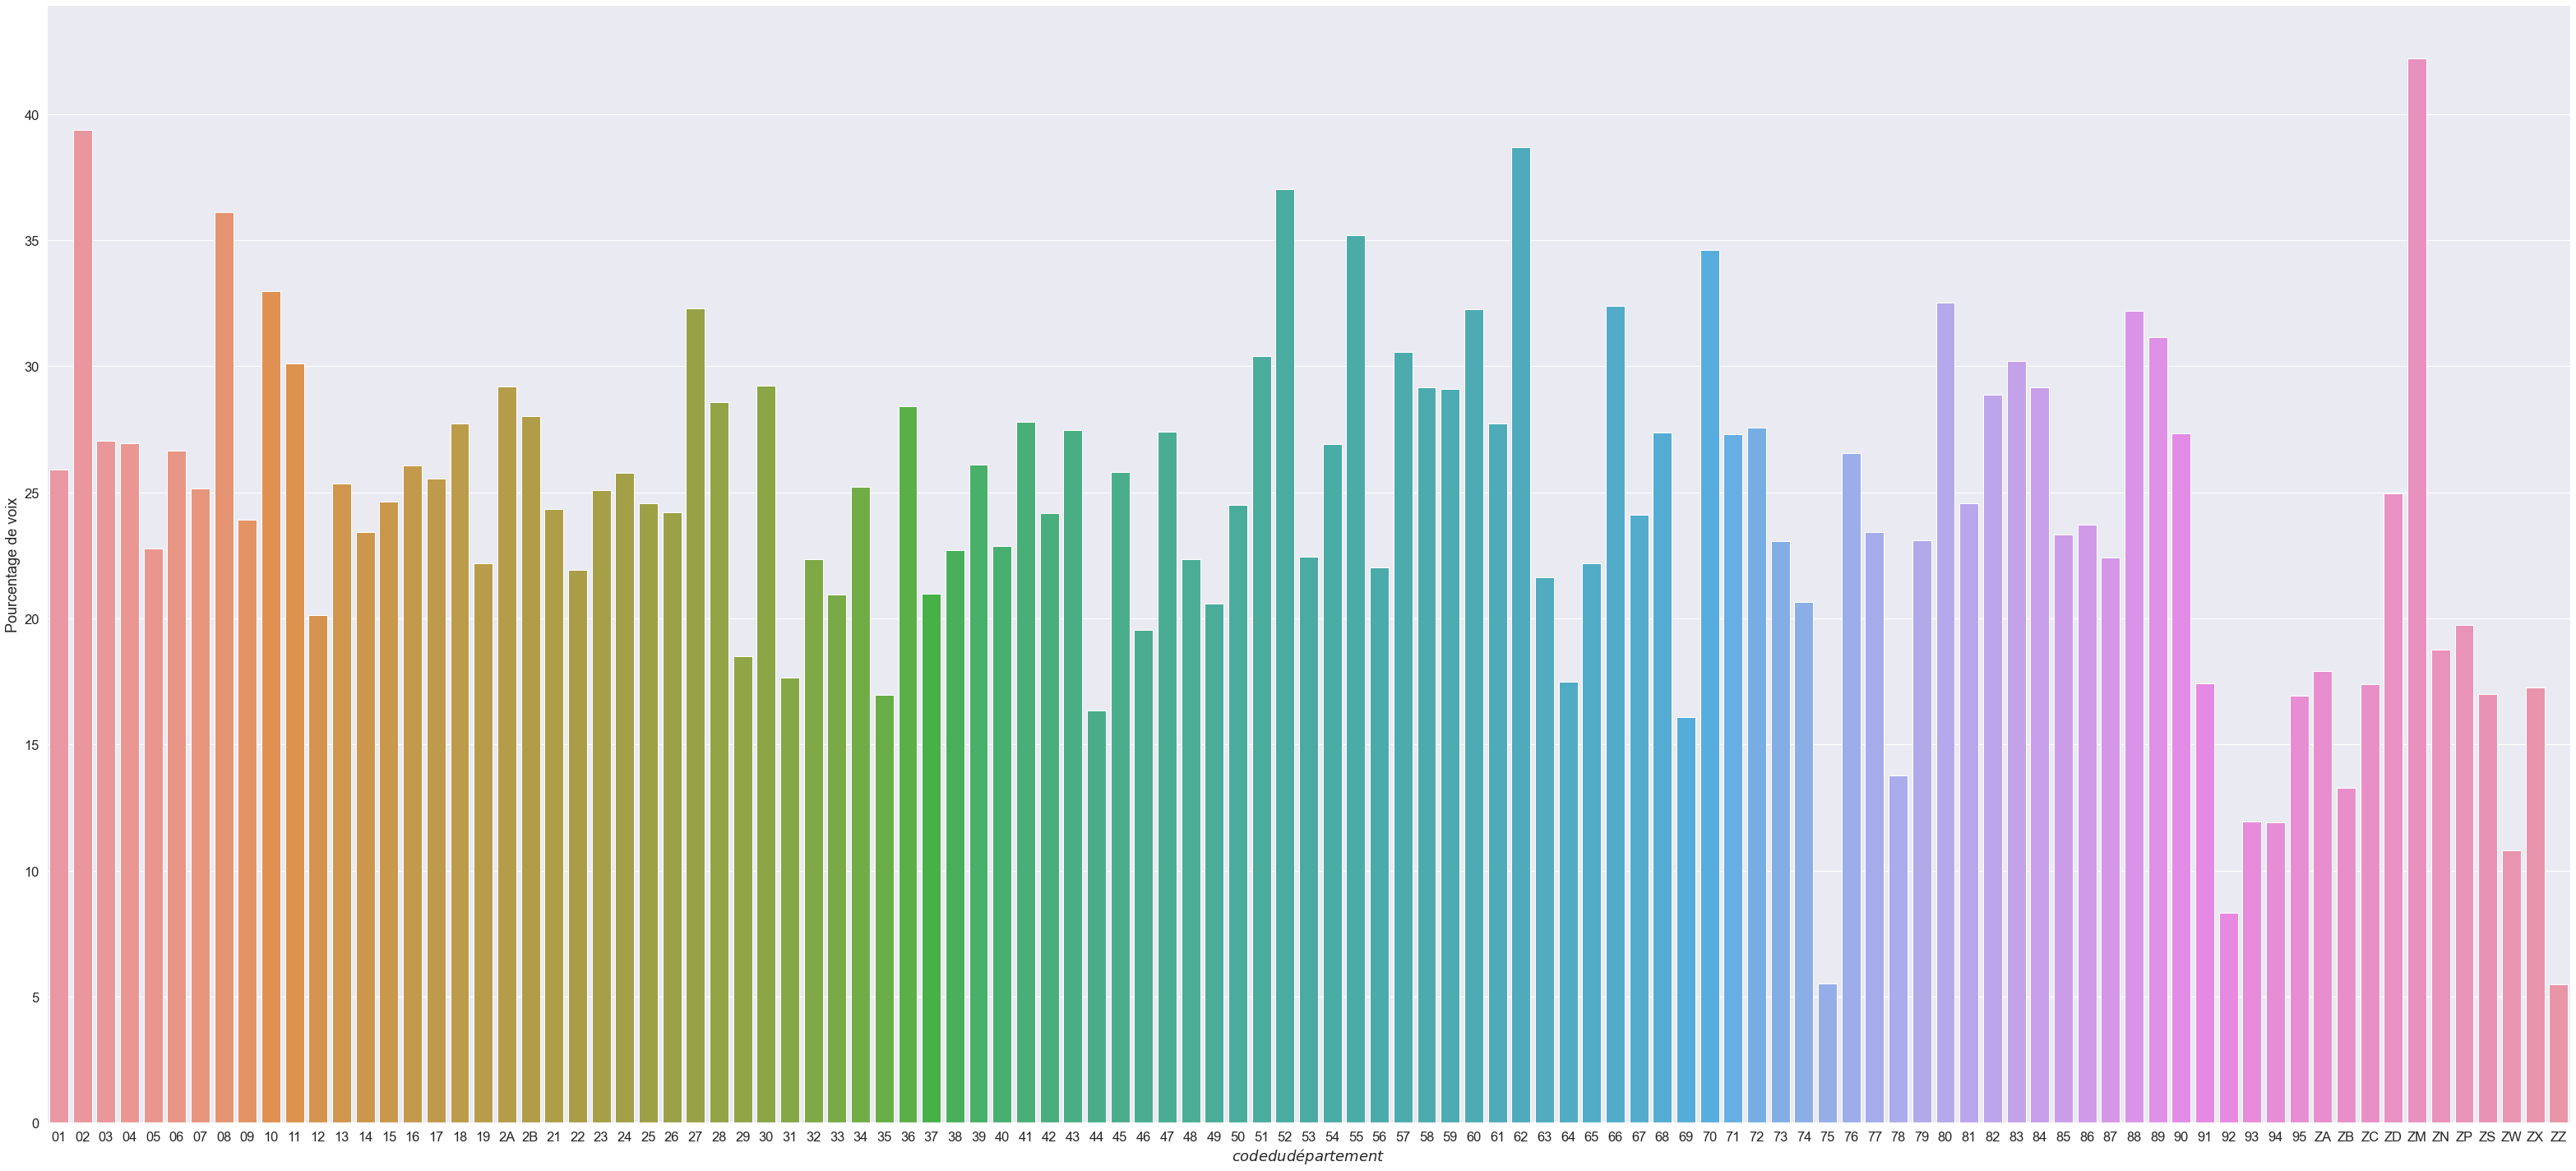

In [57]:
plt.figure(figsize=(55,25))
sns.barplot(x="code du département", y="Pourcentage de voix", data= DT3)
plt.xlabel('$code du département$')
plt.ylabel('Pourcentage de voix')
plt.show()

In [59]:
DT3.describe()#pour voir la valeur minimale, maximale et moyenne des pourcentage de votes obtenus.

,Pourcentage de voix
count,107.000000
mean,24.384814
std,6.648220
min,5.475455
25%,20.972917
50%,24.572000
75%,27.910000
max,42.210000


On peut donc traiter chaque candidat d'une manière séparée pour voir le département où il a obtenu le plus grand pourcentage de votes.

#### B.Exemple Département(59/75):

On créera une liste dont chaque élément est une liste contenant le nombre de voix obtenues par chaque candiat dans chaque département.

In [17]:
Ensemble=[]
for i in range(len(cdd)):
    departement=[]
    departement.append(ARTHAUD3[cdd[i]])
    departement.append(ROUSSEL3[cdd[i]])
    departement.append(MACRON3[cdd[i]])
    departement.append(LASSALLE3[cdd[i]])
    departement.append(LEPEN3[cdd[i]])
    departement.append(ZEMMOUR3[cdd[i]])
    departement.append(MÉLENCHON3[cdd[i]])
    departement.append(HIDALGO3[cdd[i]])
    departement.append(JADOT3[cdd[i]])
    departement.append(PÉCRESSE3[cdd[i]])
    departement.append(POUTOU3[cdd[i]])
    departement.append(DUPONT_AIGNAN3[cdd[i]])
    Ensemble.append(departement)


Traçons maintenant le Pie chart d'un département quelconque en termes de pourcentage de voix pour voir les candidats qui ont dominé les élections dans ce département

**Département 59**

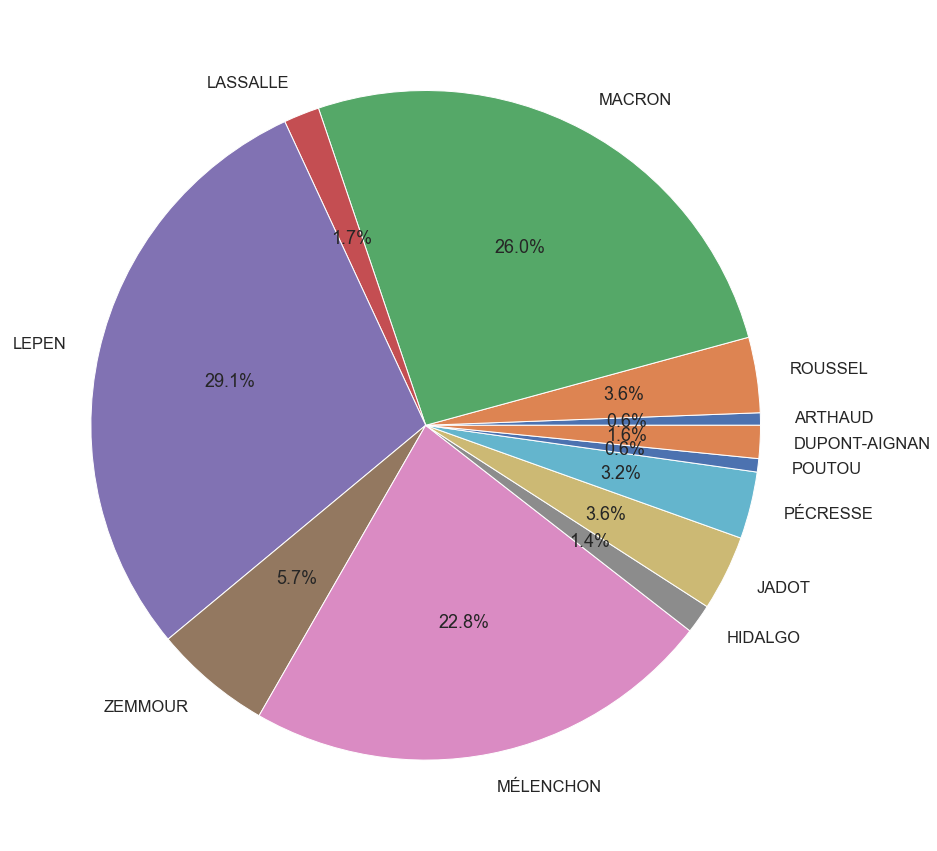

In [18]:

dep59=Ensemble[59]
plt.figure(figsize=(15,18))
plt.pie(dep59,labels=labels,autopct='%1.1f%%')

plt.show()

*On remarque que dans le département 59(Nord), Marinne Lepen était classée première suivie par Macron et Mélenchon.*

**Département 75**

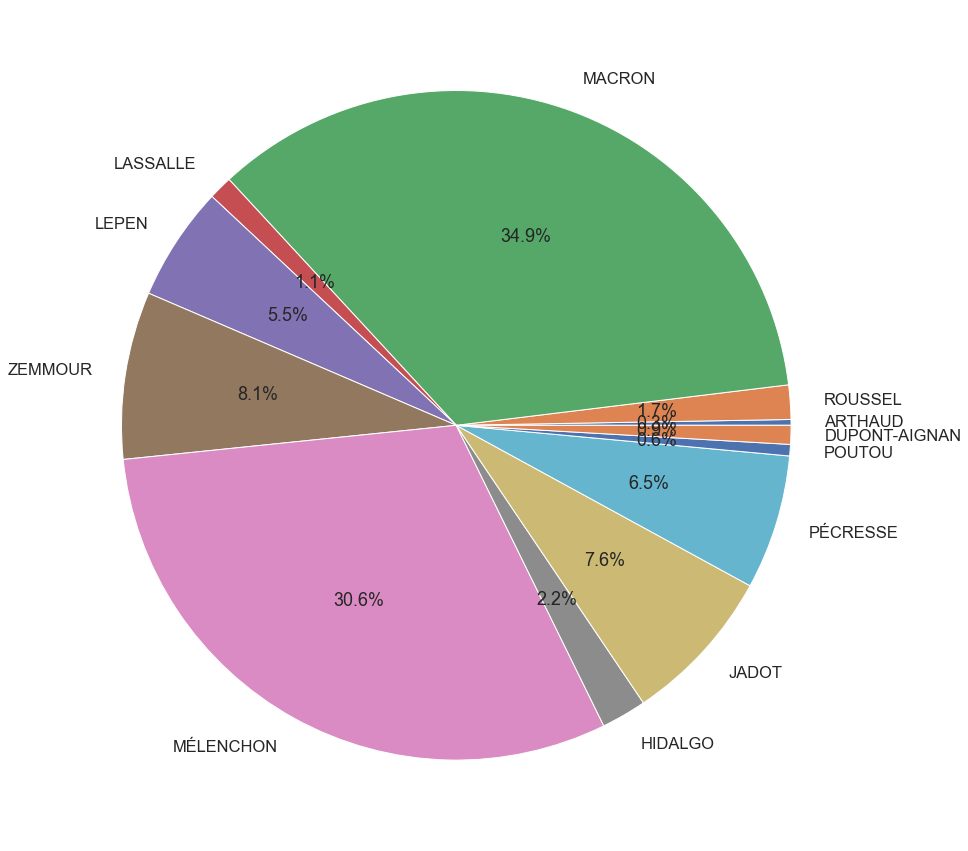

In [20]:
dep75=Ensemble[75]
plt.figure(figsize=(15,18))
plt.pie(dep75,labels=labels,autopct='%1.1f%%')
plt.show()

*Effectivement Macron et Mélenchon étaient ceux qui ont dominé les élections à Paris.*

#### 1.2.3 Traitement par circonscription 

On traitera maintenant chaque circonscription à part et on visualisera ceux qui ont eu le plus de votes. 

Soit Y le nom du candiadt, le dictionnaire Y4 contient le nombre de voix obtenues dans chaque circonscription du département 59.

In [63]:
#Restons sur l'exemple du département 59
ARTHAUD4={}
ROUSSEL4={}
MACRON4={}
LASSALLE4={}
LEPEN4={}
ZEMMOUR4={}
MÉLENCHON4={}
HIDALGO4={}
JADOT4={}
PÉCRESSE4={}
POUTOU4={}
DUPONT_AIGNAN4={}

exp01=df1[df1.index.str.contains(cdd[59])]
exp02=df2[df2.index.str.contains(cdd[59])]
exp03=df3[df3.index.str.contains(cdd[59])]
exp04=df4[df4.index.str.contains(cdd[59])]
exp05=df5[df5.index.str.contains(cdd[59])]
exp06=df6[df6.index.str.contains(cdd[59])]
exp07=df7[df7.index.str.contains(cdd[59])]
exp08=df8[df8.index.str.contains(cdd[59])]
exp09=df9[df9.index.str.contains(cdd[59])]
exp10=df10[df10.index.str.contains(cdd[59])]
exp11=df11[df11.index.str.contains(cdd[59])]
exp12=df12[df12.index.str.contains(cdd[59])]
for i in range(1,21):
    cand1=exp01[exp01['Code de la circonscription']==i]
    ARTHAUD4[i]=cand1['Voix'].sum()
    cand2=exp02[exp02['Code de la circonscription']==i]
    ROUSSEL4[i]=cand2['Voix'].sum()
    cand3=exp03[exp03['Code de la circonscription']==i]
    MACRON4[i]=cand3['Voix'].sum()    
    cand4=exp04[exp04['Code de la circonscription']==i]
    LASSALLE4[i]=cand4['Voix'].sum()
    cand5=exp05[exp05['Code de la circonscription']==i]
    LEPEN4[i]=cand5['Voix'].sum()    
    cand6=exp06[exp06['Code de la circonscription']==i]
    ZEMMOUR4[i]=cand6['Voix'].sum()
    cand7=exp07[exp07['Code de la circonscription']==i]
    MÉLENCHON4[i]=cand7['Voix'].sum()
    cand8=exp08[exp08['Code de la circonscription']==i]
    HIDALGO4[i]=cand8['Voix'].sum()
    cand9=exp09[exp09['Code de la circonscription']==i]
    JADOT4[i]=cand9['Voix'].sum()
    cand10=exp10[exp10['Code de la circonscription']==i]
    PÉCRESSE4[i]=cand10['Voix'].sum()
    cand11=exp11[exp11['Code de la circonscription']==i]
    POUTOU4[i]=cand11['Voix'].sum()
    cand12=exp12[exp12['Code de la circonscription']==i]
    DUPONT_AIGNAN4[i]=cand12['Voix'].sum()




On choisit deux exemples de circonscriptions pour visualiser les vainqueurs. On prendera la 1ère et 5ème circonscription.

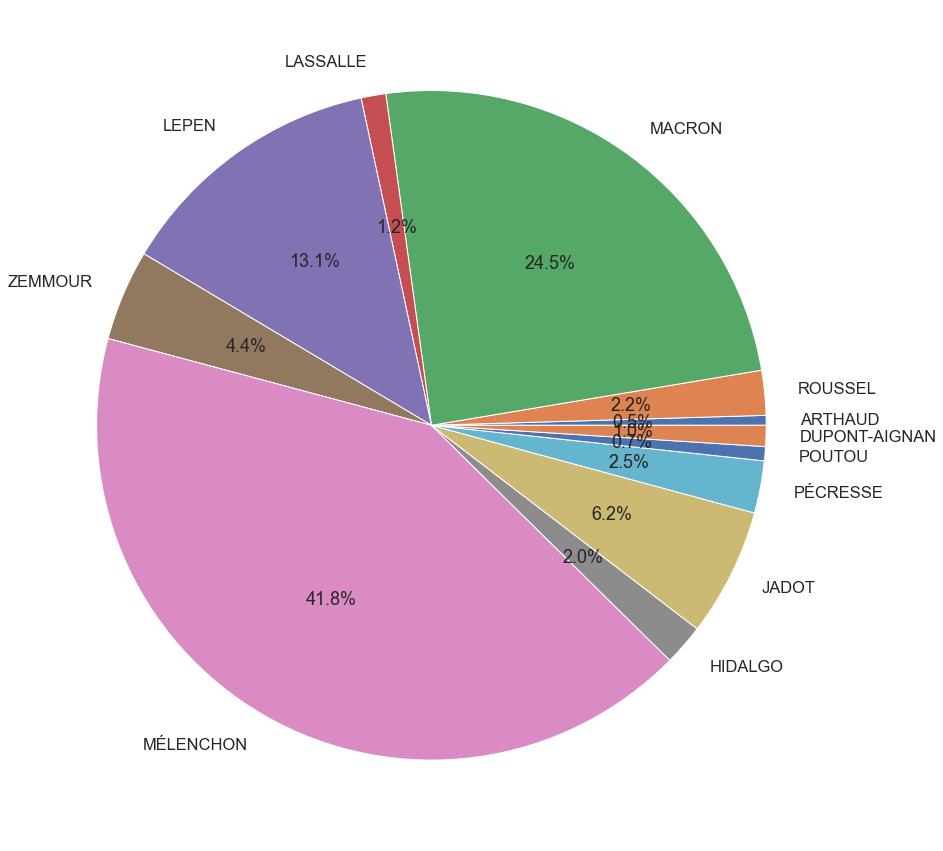

In [48]:
#1ère circonscription
cir1=[]
cir1.append(ARTHAUD4[1])
cir1.append(ROUSSEL4[1])
cir1.append(MACRON4[1])
cir1.append(LASSALLE4[1])
cir1.append(LEPEN4[1])
cir1.append(ZEMMOUR4[1])
cir1.append(MÉLENCHON4[1])
cir1.append(HIDALGO4[1])
cir1.append(JADOT4[1])
cir1.append(PÉCRESSE4[1])
cir1.append(POUTOU4[1])
cir1.append(DUPONT_AIGNAN4[1])
plt.figure(figsize=(15,18))
plt.pie(cir1,labels=labels,autopct='%1.1f%%')
plt.show()

*On remarque que Mélenchon a dominé les élections dans la 1ère circonscription du Nord même si Lepen était le vainqueur dans ce département.*

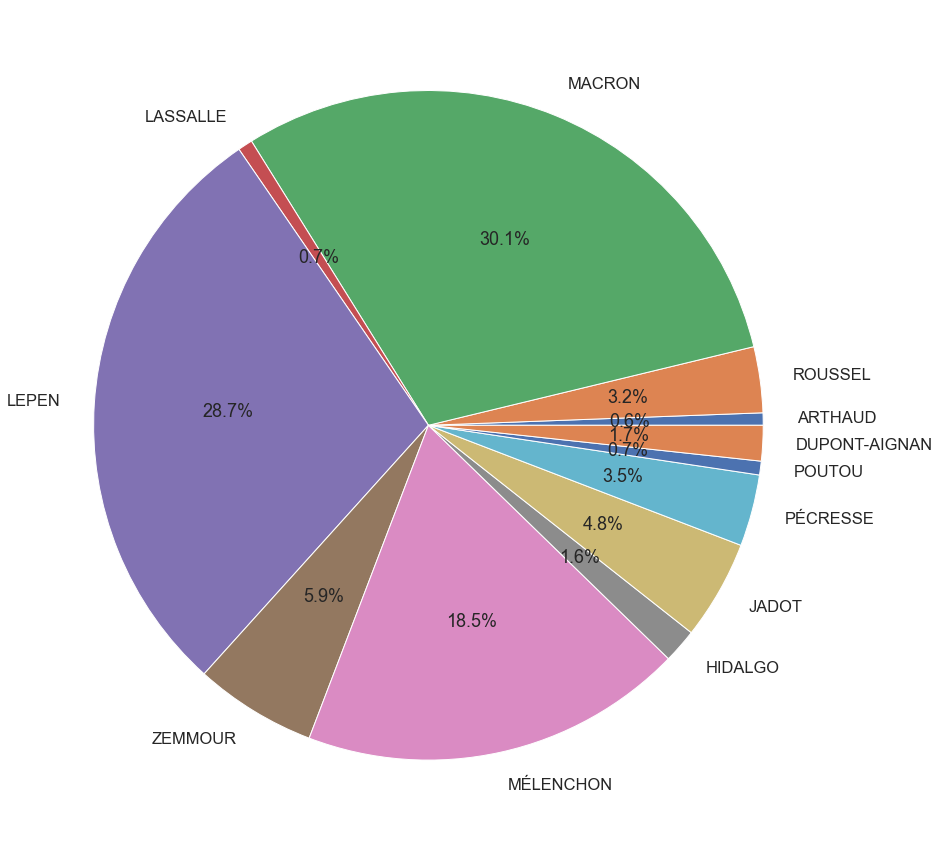

In [87]:
cir5=[]
cir5.append(ARTHAUD4[5])
cir5.append(ROUSSEL4[5])
cir5.append(MACRON4[5])
cir5.append(LASSALLE4[1])
cir5.append(LEPEN4[5])
cir5.append(ZEMMOUR4[5])
cir5.append(MÉLENCHON4[5])
cir5.append(HIDALGO4[5])
cir5.append(JADOT4[5])
cir5.append(PÉCRESSE4[5])
cir5.append(POUTOU4[5])
cir5.append(DUPONT_AIGNAN4[5])
plt.figure(figsize=(15,18))
plt.pie(cir5,labels=labels,autopct='%1.1f%%')
plt.show()

*On remarque une autre fois que ce n'est pas Lepen qui est classée première dans cette circonscripion du 59 malgré sa victoire dans ce département.*

*En effet, le choix des circonscriptions n'était pas si arbitraire, les 1ère et 5ème circonscriptions sont celles correspondant au minimum et maximum des inscrits respectivement.*

**Ainsi, on déduit que le vainqueur dans un département n'est pas nécessairement premier dans toutes les circonscrptions. Malgré la dominance de Marine Lepen dans le 59 elle n'était pas calssée première dans toutes les circonscriptions.**

### 2. Second tour

#### 2.1 Prétraitements

In [26]:
DATA2=pd.read_excel('resultats-par-niveau-cirlg-t2-france-entiere.xlsx',index_col='Code du département')

On renomme les colonnes sans nom de même manière que pour le premier fichier correspondant aux résultats du premier tour.

In [30]:
str0='0'
str1="Unnamed: "
i=26
str2=str(i)
str3=str(i+1)
str4=str(i+2)
str5=str(i+3)
str6=str(i+4)
str7=str(i+5)
str8=str(i+6)
DATA2.rename(columns={str1+str5:'Prénom'+str0,str1+str6:'Voix'+str0,str1+str7:'%Voix/Ins'+str0,str1+str8:'%Voix/Exp'+str0},inplace=True)
DATA2.rename(columns={str1+str2:'N_panneau'+str0,str1+str3:'Sexe'+str0,str1+str4:'Nom'+str0},inplace=True)


On crée comme pour les résultats du premier tour deux DataFrames correpondant à chacun des deux candidats

In [64]:
DF1=pd.DataFrame(DATA2,columns=['Libellé du département','Code de la circonscription','Libellé de la circonscription','Etat saisie','Inscrits','Abstentions','% Abs/Ins','Votants','% Vot/Ins','Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Nom','Voix','% Voix/Ins','% Voix/Exp'])
DF2=pd.DataFrame(DATA2,columns=['Libellé du département','Code de la circonscription','Libellé de la circonscription','Etat saisie','Inscrits','Abstentions','% Abs/Ins','Votants','% Vot/Ins','Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Nom0','Voix0','%Voix/Ins0','%Voix/Exp0'])
DF2.rename(columns={'Nom0':'Nom','Voix0':'Voix','%Voix/Ins0': '%Voix/Ins','%Voix/Exp0': '%Voix/Exp'},inplace=True)

On prendera comme au début l'exemple du département 59 et 75 pour voir si les deux candidats vont dominer une autre fois les voix dans ces départements.
On créera pour chaque candiadt deux dictionnaires contenant la somme des voix obtenues pour chaque département et la moyenne du pourcentage de voix obtenues dans chaque département pour visualiser où les deux candidats ont eu les meilleurs résultats.

In [32]:
MACRON5={}
LEPEN5={}
MACRON6={}
LEPEN6={}
for i in range(len(cdd)):
    DFF1=DF1[DF1.index.str.startswith(cdd[i])]
    DFF2=DF2[DF2.index.str.startswith(cdd[i])]
    
    MACRON5[cdd[i]]=DFF1['Voix'].sum()
    LEPEN5[cdd[i]]=DFF2['Voix'].sum()
    
    MACRON6[cdd[i]]=DFF1['% Voix/Exp'].mean()
    LEPEN6[cdd[i]]=DFF2['%Voix/Exp'].mean()
    
#on créera maintenant deux dataframe contenant le nombre de voix obtenues pour les deux candidats dans chaque département
Mac=[i for i in MACRON5.values()]
Lep=[i for i in LEPEN5.values()]
dic5={}
dic6={}
dic5['Code du département']=cdd
dic5['Nbr de voix Macron']=Mac
dic6['Code du département']=cdd
dic6['Nbr de voix Lepen']=Lep

DTT=pd.DataFrame(dic5)
DTT2=pd.DataFrame(dic6)
DTT.head(n=10)
DTT2.head()



,Code du département,Nbr de voix Lepen
0,01,136370
1,02,153069
2,03,79762
3,04,44139
4,05,34446


Première exploitation est de voir le vainqueur.

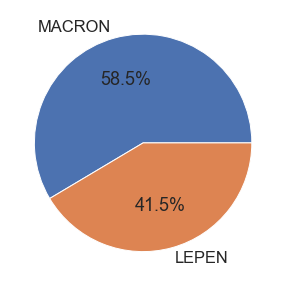

In [33]:
sum1=0
sum2=0
for i in range(len(cdd)):
    sum1+=Mac[i]
    sum2+=Lep[i]
Vict=[sum1,sum2]
labels2=['MACRON','LEPEN']
plt.figure(figsize=(18,5))
plt.pie(Vict,labels=labels2,autopct='%1.1f%%')
plt.show()


*Macron nouveau président de la république.*

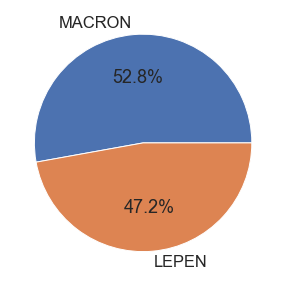

In [34]:
#exemple Département 59
liste=[Mac[59],Lep[59]]
plt.figure(figsize=(18,5))
plt.pie(liste,labels=labels2,autopct='%1.1f%%')
plt.show()






*Malgré la dominance de Marine LEPEN au premier tour dans le département Nord, elle s'est inclinée face à Macron au second tour dans ce même département.*

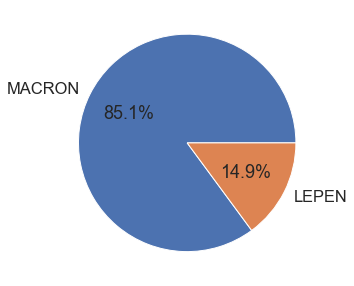

In [35]:
#département 75
liste2=[Mac[75],Lep[75]]
plt.figure(figsize=(18,5))
plt.pie(liste2,labels=labels2,autopct='%1.1f%%')
plt.show()

*Dominance totale de Macron à Paris comme prévu, étant donné que Mélenchon a demandé à ceux qui ont voté pour lui de voter pour Macron.*

**Pour faciliter la visualisation des meilleurs résultats personnels, on va trier les dictionnaires MACRON6 et LEPEN6.**

In [38]:
sorted(LEPEN6.items(),key=lambda t:t[1],reverse=True)

[('ZA', 69.69749999999999),
 ('ZB', 60.650000000000006),
 ('ZC', 60.32),
 ('02', 60.001999999999995),
 ('ZD', 59.46999999999999),
 ('ZM', 58.644999999999996),
 ('2A', 58.335),
 ('2B', 57.845),
 ('62', 57.49250000000001),
 ('52', 57.315),
 ('70', 56.900000000000006),
 ('08', 56.84),
 ('66', 55.84),
 ('55', 55.620000000000005),
 ('ZX', 55.42),
 ('11', 54.88666666666666),
 ('83', 54.636250000000004),
 ('60', 52.721428571428575),
 ('88', 52.4175),
 ('30', 51.96),
 ('82', 51.915),
 ('10', 51.66333333333333),
 ('84', 51.54600000000001),
 ('04', 51.51),
 ('89', 51.416666666666664),
 ('27', 51.376),
 ('ZS', 50.69),
 ('47', 50.669999999999995),
 ('80', 50.532),
 ('58', 49.980000000000004),
 ('06', 49.87111111111111),
 ('43', 49.739999999999995),
 ('57', 49.71111111111111),
 ('09', 48.825),
 ('ZP', 48.63333333333333),
 ('24', 48.55),
 ('90', 48.54),
 ('36', 48.415000000000006),
 ('23', 47.96),
 ('07', 47.75666666666667),
 ('51', 47.664),
 ('03', 47.663333333333334),
 ('18', 47.22),
 ('28', 47.21

In [39]:
sorted(MACRON6.items(),key=lambda t:t[1],reverse=True)

[('ZZ', 85.45545454545456),
 ('75', 85.10833333333333),
 ('92', 80.41923076923078),
 ('94', 74.28818181818183),
 ('93', 73.57166666666666),
 ('35', 71.10125),
 ('78', 71.06333333333332),
 ('44', 70.268),
 ('69', 69.395),
 ('29', 67.52625),
 ('ZW', 67.45),
 ('95', 66.374),
 ('49', 66.11142857142858),
 ('91', 65.84400000000001),
 ('31', 65.267),
 ('53', 64.15666666666665),
 ('37', 63.45799999999999),
 ('64', 62.89833333333333),
 ('56', 62.82999999999999),
 ('22', 62.71),
 ('33', 62.26499999999999),
 ('79', 62.196666666666665),
 ('85', 61.65400000000001),
 ('74', 61.46666666666666),
 ('ZN', 61.185),
 ('14', 60.82333333333333),
 ('67', 60.80777777777777),
 ('63', 60.556),
 ('38', 60.438),
 ('12', 59.92333333333334),
 ('86', 59.809999999999995),
 ('50', 59.6725),
 ('87', 59.276666666666664),
 ('46', 59.230000000000004),
 ('42', 58.26666666666666),
 ('73', 57.597500000000004),
 ('21', 57.49400000000001),
 ('45', 57.33166666666667),
 ('77', 57.20363636363636),
 ('76', 56.678999999999995),
 ('

Le nombre de départements où un candidat a eu un pourcentage de votes plus grand que 50% indique qu'il été classé premier. On calculera donc le nombre de départements où chaque candidat a été premier. 

In [40]:
M=0
L=0
for i in range(len(cdd)):
    if MACRON6[cdd[i]]>50:
        M+=1
        
print('Macron était premier dans',M,'départements')
for i in range(len(cdd)):
    if LEPEN6[cdd[i]]>50:
        L+=1
print('Lepen était première dans',L,'départements')


Macron était premier dans 78 départements
Lepen était première dans 29 départements


*NB : Le nombre de départements où un candidat été premier n'influence pas sur le résultat final des élections, cela dépend du nombre de votants dans le département. Une victoire de 65% dans un département où 10000 personnes ont voté est rien devant une victoire de 55% où 2000000 ont voté.*

On s'intéressera ensuite au nombre d'abstentions dans le premier tour et le deuxième pour voir en quel tours les gens sont plus présents.

In [125]:
X=DATAA['Abstentions'].to_numpy()
X = X.reshape(-1, 1)
Y = DATAA['Inscrits'].to_numpy()
Y = Y.reshape(-1, 1)

Estimation : a = 0.9 et b = 65040.3


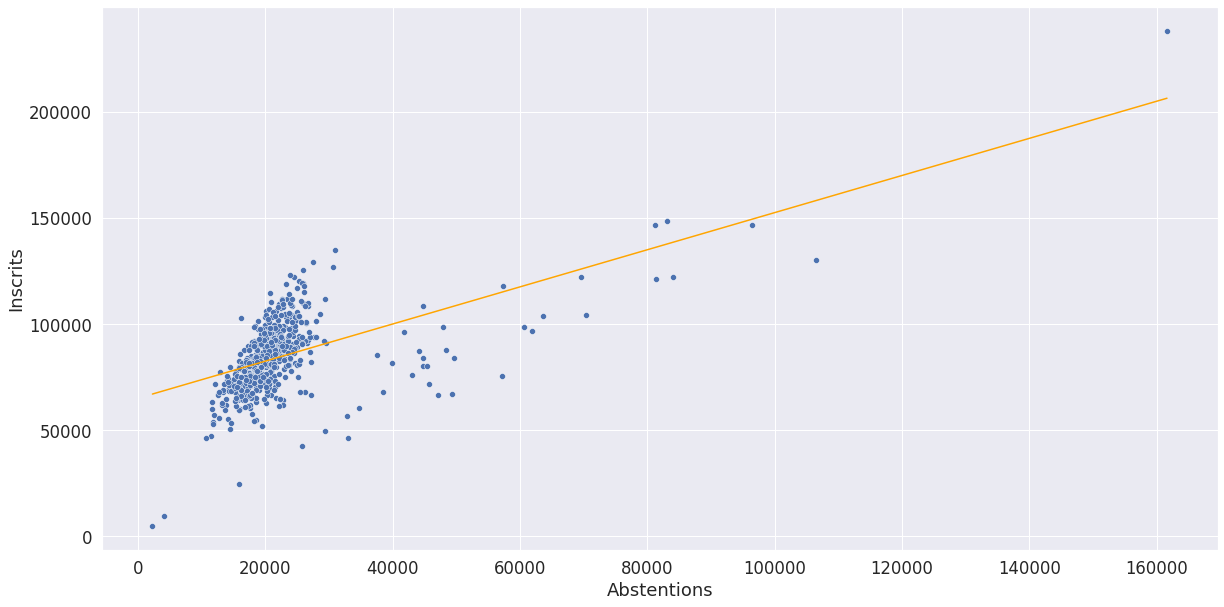

In [126]:
linear_regressor = LinearRegression(copy_X=True, fit_intercept=True,
                 normalize=True)

result = linear_regressor.fit(X, Y)
print("Estimation : a = %.1f" %result.coef_[0] + " et b = %.1f" %result.intercept_)

plt.figure(figsize=(20,10))
sns.scatterplot(y="Inscrits", x='Abstentions',legend="full", data=DATAA)
plt.plot([np.min(X), np.max(X)], [result.intercept_ + np.min(X)*result.coef_[0], result.intercept_ + np.max(X)*result.coef_[0]], 'orange')
plt.show()


In [128]:
r_sq = result.score(X, Y)
print('coefficient de determination:', r_sq)


coefficient de determination: 0.3288513139741084


*Vu que le coeficient de détermination n'est pas si proche de 1, le modèle de régression linéaire n'explique pas vraiement la relation entre les deux variables.*

In [129]:
W=DATA2['Abstentions'].to_numpy()
W = W.reshape(-1, 1)
Z = DATA2['Inscrits'].to_numpy()
Z = Z.reshape(-1, 1)

Estimation : a = 1.0 et b = 61303.6


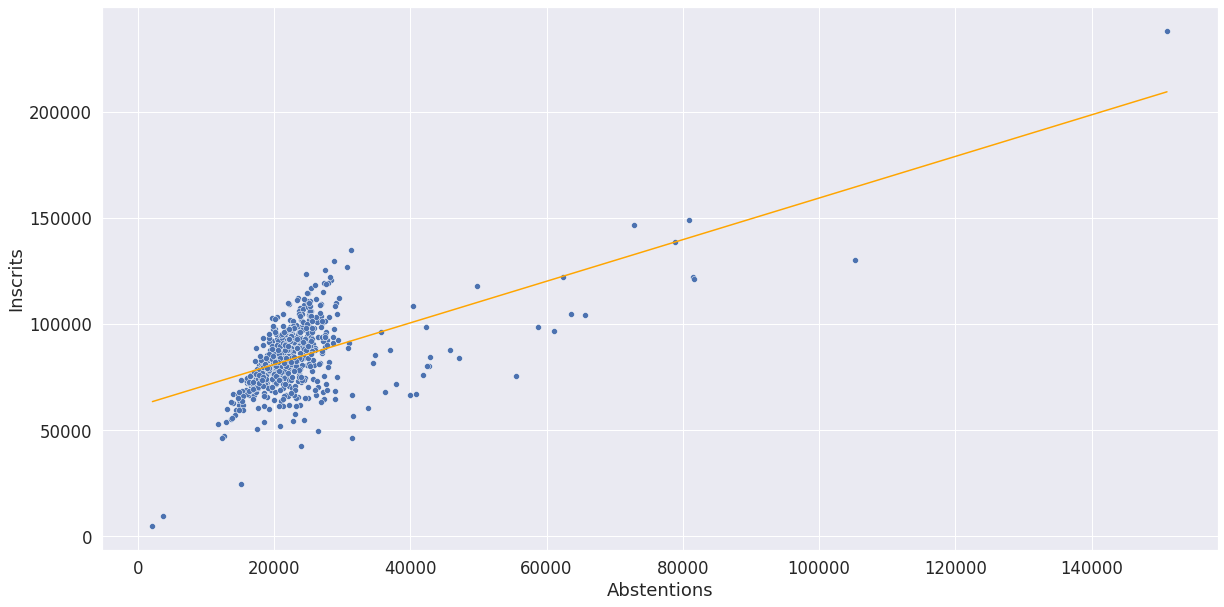

In [130]:
linear_regressor = LinearRegression(copy_X=True, fit_intercept=True,
                 normalize=True)

result = linear_regressor.fit(W, Z)
print("Estimation : a = %.1f" %result.coef_[0] + " et b = %.1f" %result.intercept_)

plt.figure(figsize=(20,10))
sns.scatterplot(y="Inscrits", x='Abstentions',legend="full", data=DATA2)
plt.plot([np.min(W), np.max(W)], [result.intercept_ + np.min(W)*result.coef_[0], result.intercept_ + np.max(W)*result.coef_[0]], 'orange')
plt.show()


On remarque qu'il existe une reltion presque no linéaire
Autre remarque est que le nombre d'abstentions reste presque le même soit au premier tour soit au deuxième tour.

In [131]:
r_sq = result.score(W, Z)
print('coefficient de determination:', r_sq)

coefficient de determination: 0.3346870238062001


On exécute DATAA.corr()et DATA2.corr() pour avoir une meilleure idée à propos de la corrélation entre les variables.
On effectuera maintenant une régression linéaire entre les Inscrits et les votants.


Estimation : a = 0.9 et b = 27162.8


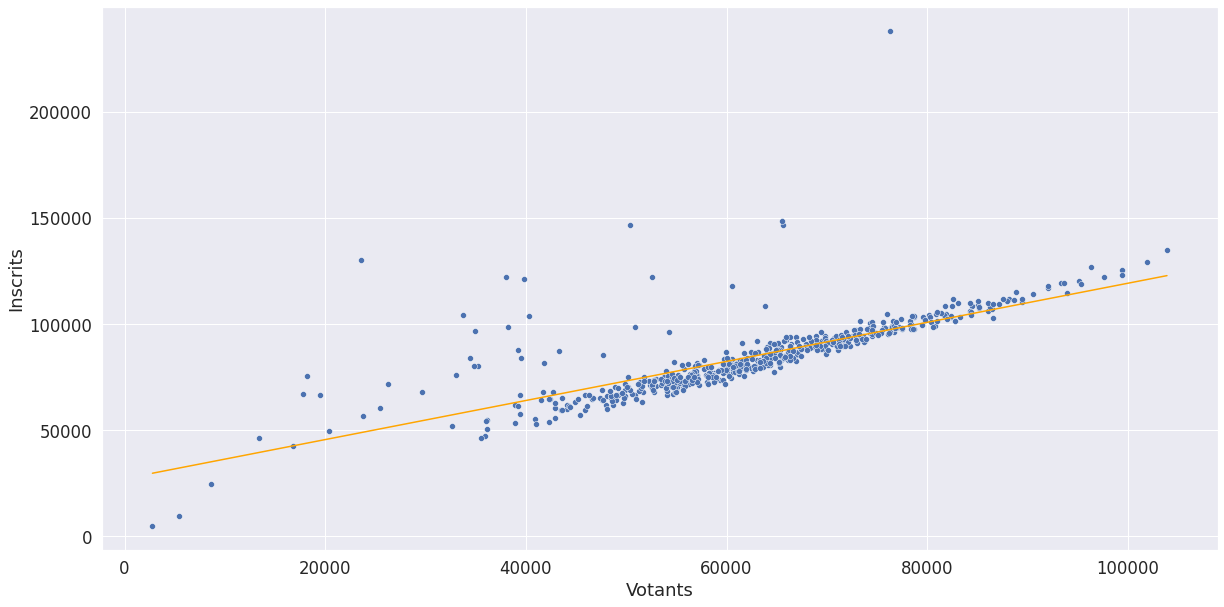

coefficient de determination: 0.5746256637932565


In [133]:
A=DATAA['Votants'].to_numpy()
A = A.reshape(-1, 1)
linear_regressor = LinearRegression(copy_X=True, fit_intercept=True,
                 normalize=True)

result = linear_regressor.fit(A, Y)
print("Estimation : a = %.1f" %result.coef_[0] + " et b = %.1f" %result.intercept_)

plt.figure(figsize=(20,10))
sns.scatterplot(y="Inscrits", x='Votants',legend="full", data=DATAA)
plt.plot([np.min(A), np.max(A)], [result.intercept_ + np.min(A)*result.coef_[0], result.intercept_ + np.max(A)*result.coef_[0]], 'orange')
plt.show()
r_sq = result.score(A, Y)
print('coefficient de determination:', r_sq)


*Ce qu'on peut constater c'est que le nombre de votants est presque linéairement relié aux Inscrits dans les élections.*

Estimation : a = 1.0 et b = 24310.4


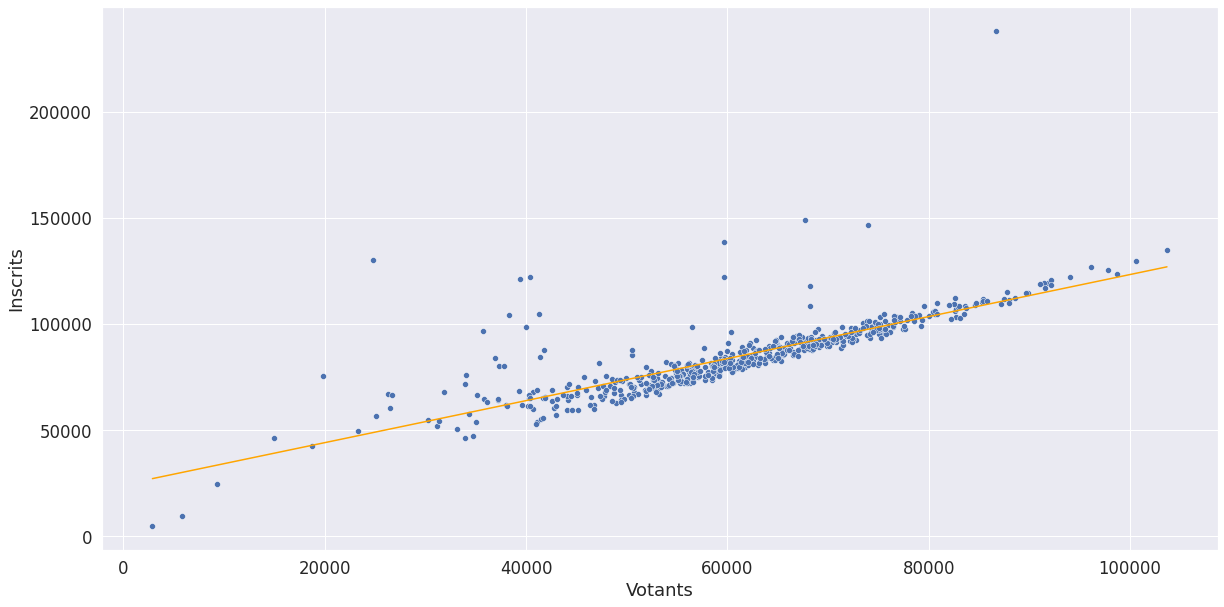

coefficient de determination: 0.6514517249916332


In [135]:
B=DATA2['Votants'].to_numpy()
B = B.reshape(-1, 1)
linear_regressor = LinearRegression(copy_X=True, fit_intercept=True,
                 normalize=True)

result = linear_regressor.fit(B, Z)
print("Estimation : a = %.1f" %result.coef_[0] + " et b = %.1f" %result.intercept_)

plt.figure(figsize=(20,10))
sns.scatterplot(y="Inscrits", x='Votants',legend="full", data=DATA2)
plt.plot([np.min(B), np.max(B)], [result.intercept_ + np.min(B)*result.coef_[0], result.intercept_ + np.max(B)*result.coef_[0]], 'orange')
plt.show()
r_sq = result.score(B, Z)
print('coefficient de determination:', r_sq)